**Importing Necessary Libraries**

In [68]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Building necessary libraries**

In [69]:
# This function converts RGB image to Greayscale 

def to_grayscale(image):

    h, w=image.shape[0], image.shape[1]
    img= np.zeros((h, w), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            gray_value = 0.2989*image[i, j, 0] + 0.5870*image[i, j, 1] + 0.1140*image[i, j, 2]   # This formula is based on Human Perception of Images.
            img[i, j] = np.uint8(gray_value)  
    return img

In [70]:
# Convlution function
def convolution(image, kernel, show=False):
    
    h, w= image.shape[0], image.shape[1]  
    pad= kernel.shape[0]//2     # Padding needed to keep the size of the image same

    # Padding the image
    img_padded= np.zeros((h+2*pad, w+2*pad), dtype= np.float32)  

    for i in range(h+2*pad):
        for j in range(w+2*pad):
            if i>=pad and i<h+pad and j>=pad and j<w+pad:
                img_padded[i,j]=image[i-pad,j-pad]

    # Peforming convlutions
    img_conv= np.zeros((h,w),dtype=np.float32)       # Shape is same as that of "image"

    for i in range(h):
        for j in range(w):
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    img_conv[i, j]+= img_padded[i + k, j + l]*kernel[k, l]
 
    img_conv = np.clip(img_conv, 0, 255).astype(np.uint8)      # Normalizing and converting to uint

    if show:
        plt.imshow(img_conv, cmap='gray')
        plt.title('Convluted image')
        plt.show()

    return img_conv

In [71]:
# Sobel function
def sobel_operator(image, show=True):
    # Sobel kernels
    kernel_x = np.array([[1, 0, -1],     # Sobel kernel for x-direction
                         [2, 0, -2],    
                         [1, 0, -1]])

    kernel_y = np.array([[1, 2, 1],      # Sobel kernel for y-direction
                         [0, 0, 0],
                         [-1, -2, -1]])

    # Convolution with Sobel kernels
    img_x = convolution(image, kernel_x).astype(np.float32)
    img_y = convolution(image, kernel_y).astype(np.float32)
    
    # Magnitude of gradients
    img_magnitude = np.sqrt(img_x**2 + img_y**2)
    img_magnitude = np.clip(img_magnitude, 0, 255).astype(np.uint8)

    if show:
        plt.imshow(img_magnitude, cmap='gray')
        plt.title('Sobel Filter')
        plt.axis('off')
        plt.show()

    return img_magnitude

**Some Demonstration**

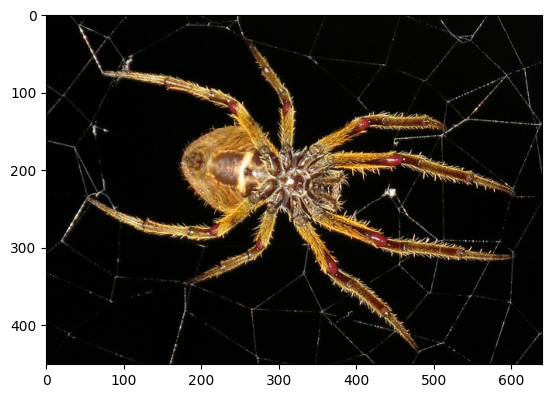

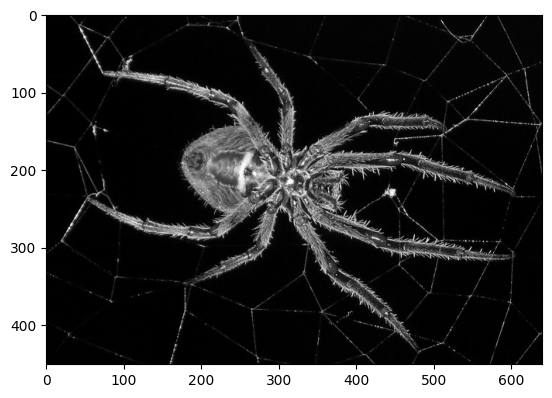

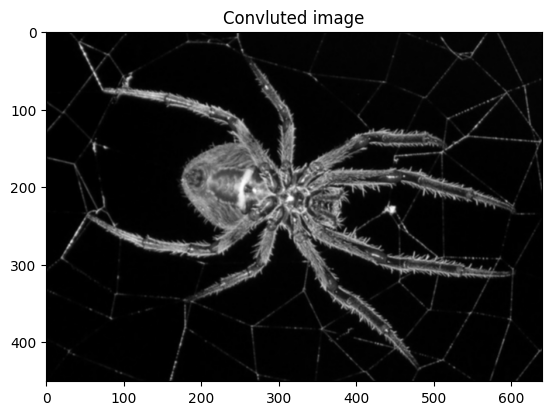

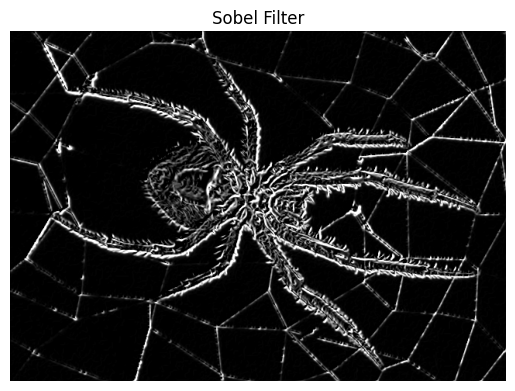

In [77]:
img=cv2.imread('spider.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
img_gray= to_grayscale(img)  # Convert to grayscale
plt.imshow(img_gray, cmap='gray')
plt.show()
kernel=np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]],dtype=np.float32)
kernel /= kernel.sum()
img1=convolution(img_gray, kernel, show=True)
imgg=sobel_operator(img1,show=True)

In [78]:
# This function make use of pre defined function to perform standard edge detection usinf sobel filter

def Simple_edge_detector(image, threshold):
    edge=sobel_operator(image, show=False)
    for i in range(edge.shape[0]):
        for j in range(edge.shape[1]):
            if edge[i, j] < threshold:
                edge[i, j]= 0
            else:
                edge[i, j]= 255
    return edge

**Demonstration**

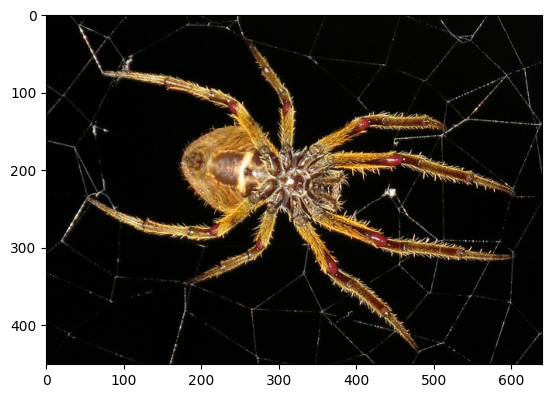

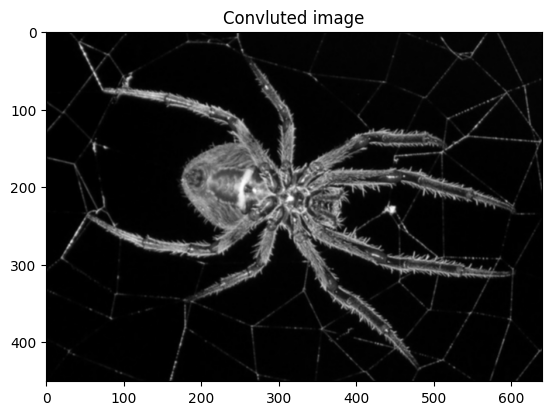

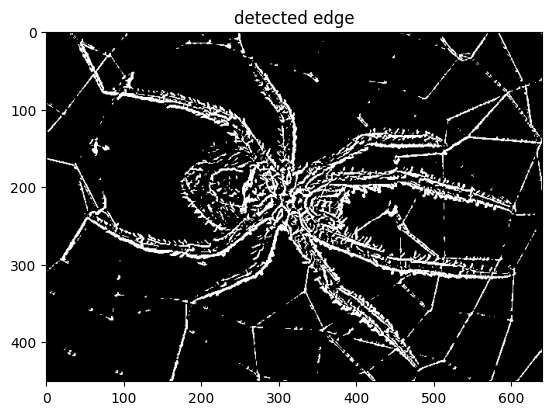

In [79]:
img=cv2.imread('spider.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
img_gray= to_grayscale(img)
kernel=np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]],dtype=np.float32)
kernel /= kernel.sum()
img1=convolution(img_gray, kernel, show=True)
edge=Simple_edge_detector(img1, 80)
plt.imshow(edge, cmap='gray')
plt.title('detected edge')
plt.show()

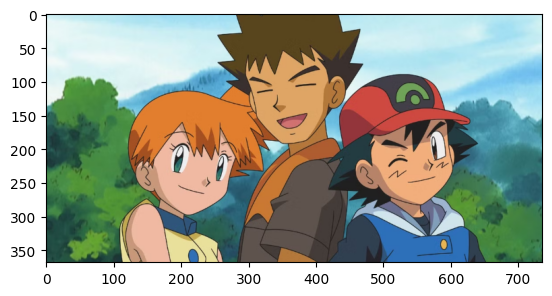

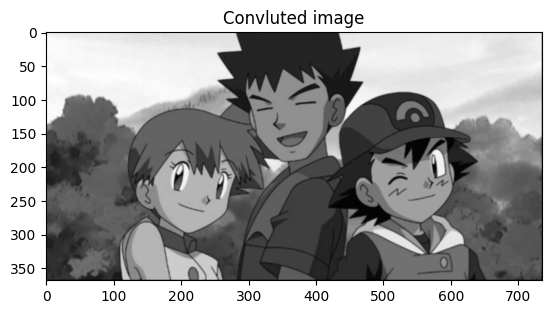

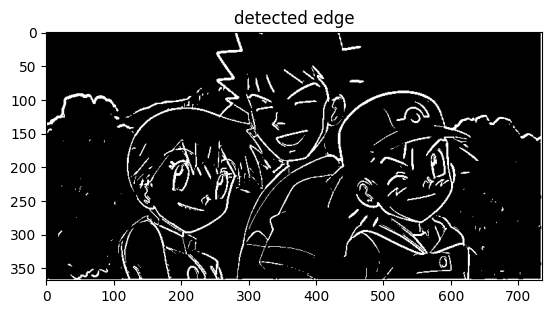

In [80]:
img=cv2.imread('image.png', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
img_gray= to_grayscale(img)  # Convert to grayscale
kernel=np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]],dtype=np.float32)
kernel /= kernel.sum()
img1=convolution(img_gray, kernel, show=True)

edge=Simple_edge_detector(img1, 80)
plt.imshow(edge, cmap='gray')
plt.title('detected edge')
plt.show()

**This is a edge detection method that I stumbeled upon while experimenting**

In [83]:
def modified_edge_detector(image, threshhold):

    kernel=np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]],dtype=np.float32)
    kernel /= kernel.sum()
    
    img_avg=(image[:,:,0]+image[:,:,1]+image[:,:,2])/3
    img_gray= to_grayscale(image)
    img= (img_avg - img_gray)
    plt.imshow(img, cmap= 'gray')
    plt.show()

    img1=convolution(img, kernel, show=True)
    edge=Simple_edge_detector(img1, threshhold)
    plt.imshow(edge, cmap='gray')
    plt.title('detected edge')
    plt.show()

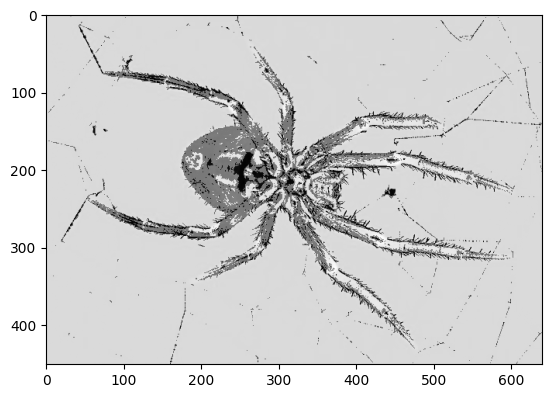

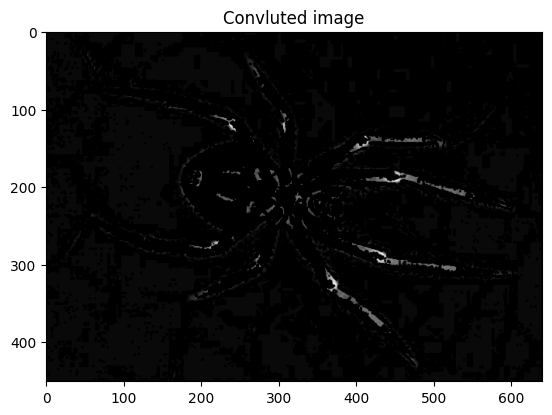

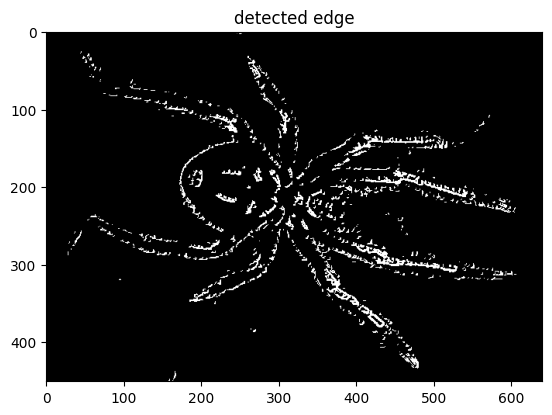

In [86]:
img=cv2.imread('spider.jpg')
modified_edge_detector(img, 5)